### **《信息论》** _Claude Shannon's_ **《Information Theory》**

1. 信息：定义为减少不确定性的量。

2. 一个事件的**信息量**与其发生的**概率**有关。越不可能发生的事件，发生时提供的信息量越大。 $I(x) = -log_{2}(p(x))$

3. **熵 Entropy**: 表示平均信息量（或不确定性）。
    对于一个离散随机变量 $X$，及其分布概率 $p(x)$ ，熵的公式定义为：$H(X) = - \sum p(x) log_{2}(p(x))$。熵越高，系统的随机性（或不确定性）越大。


现代的电报通讯、ZIP文件压缩、JPEG图像压缩、密码学等都来自于香农信息论这个原理。其主要关注的是数据都统计特性，而不考虑信息的语义或提取其所需的计算成本。比如，


- 一段sha256加密的密钥文本
- 一段身份证号码

后来香农熵又推广到了量子信息领域：量子比特（Qubit）和量子熵等。

一个值得注意的点，在香农熵看来两者的具有相同的信息量。但是如果真要提取他们各自的语义信息则所需的计算资源完全不同。


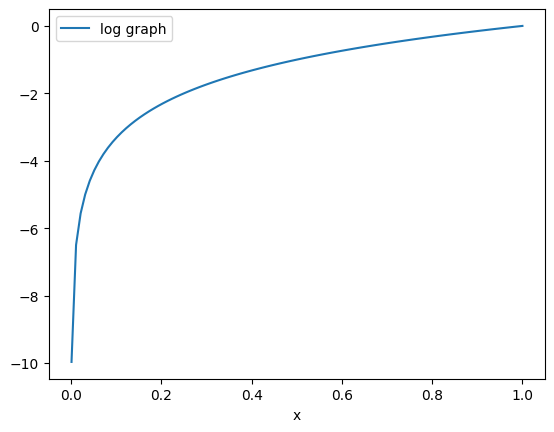

-0.3979400086720376 —— 10为底数的0.4对数值
-0.916290731874155 —— 自然数e为底数的0.4对数值
-1.3219280948873622 —— 2为底数的0.4对数值


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x values (non-negative values up to 1)
x = np.linspace(0.001, 1, 100)

# Define the function graph
y = np.log2(x)

# Plot the graph of y vs x
plt.plot(x, y, label='log graph')

# Add labels and legend
plt.xlabel('x')
plt.legend()

# Show the plot
plt.show()

print(f"{np.log10(0.4)} —— 10为底数的0.4对数值")
print(f"{np.log(0.4)} —— 自然数e为底数的0.4对数值")
print(f"{np.log2(0.4)} —— 2为底数的0.4对数值")

上面的对数函数图展示了 $log_2(x)$ 在 $(0, 1]$ 区间的行为。接下来我们用代码直观感受两件事：

1. **二元熵函数**：当一个随机变量只有两种结果时（比如抛硬币），它的熵如何随概率变化？
2. **信息量的直觉**：不同概率的事件，发生时到底携带多少信息？

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Arial Unicode MS', 'SimHei', 'sans-serif']

# Binary entropy function H(p) for a two-outcome random variable
p = np.linspace(0.001, 0.999, 500)
H = -p * np.log2(p) - (1 - p) * np.log2(1 - p)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: binary entropy curve
axes[0].plot(p, H, 'b-', linewidth=2)
axes[0].set_xlabel('p')
axes[0].set_ylabel('H(p) bits')
axes[0].set_title('Binary Entropy Function')
axes[0].axvline(x=0.5, color='r', linestyle='--', alpha=0.5, label='p=0.5')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right: information content of different events
events = {
    'Coin flip\n(heads)': 0.5,
    'Dice roll\n(one face)': 1/6,
    'Common char\n"de"': 0.04,
    'Rare char\n"da"': 0.0001,
    'Lottery': 1e-7,
}
names = list(events.keys())
probs = list(events.values())
info_content = [-np.log2(p_val) for p_val in probs]

colors = ['#4CAF50', '#2196F3', '#FF9800', '#F44336', '#9C27B0']
bars = axes[1].bar(names, info_content, color=colors)
axes[1].set_ylabel('I(x) bits')
axes[1].set_title('Information Content of Events')
axes[1].grid(True, alpha=0.3, axis='y')

for bar, val, prob in zip(bars, info_content, probs):
    axes[1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.3,
                 f'{val:.1f} bits\n(p={prob:.4g})', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# The key intuition: rarer events carry more information
print(f"公平硬币正面朝上：I = -log2(0.5)  = {-np.log2(0.5):.1f} 比特")
print(f"骰子掷出某一面：  I = -log2(1/6)  = {-np.log2(1/6):.2f} 比特")
print(f"中彩票：          I = -log2(1e-7) = {-np.log2(1e-7):.1f} 比特")
print()
print("左图可以看到，p=0.5时熵最大——完全不确定的结果包含最多信息。")
print("右图很直观：越罕见的事件，发生时给我们的信息量越大。")

### 互信息

对于两个离散随机变量 $X$ 和 $Y$（分别取值 $x_{i}$ 和 $y_{i}$），互信息 $I(X;Y)$ 定义为：

$$
I(X;Y) = \sum_{x \in X} \sum_{y \in Y} p(x, y) \log_2 \left( \frac{p(x, y)}{p(x)p(y)} \right)
$$

对于连续随机变量，求和变为积分：

$$
I(X;Y) = \iint p(x, y) \log_2 \left( \frac{p(x, y)}{p(x)p(y)} \right) \, dx \, dy
$$

### 互信息的等价形式

互信息可以用熵（Entropy）和条件熵（Conditional Entropy）表达，具有以下几种等价定义：

#### 1. 基于熵的定义：

$$
I(X;Y) = H(X) + H(Y) - H(X,Y)
$$

- $H(X)$：$X$ 的熵（不确定性）。
- $H(Y)$：$Y$ 的熵。
- $H(X,Y)$：$X$ 和 $Y$ 的联合熵。
- **意义**：互信息是单独熵之和减去联合熵，表示两变量的冗余信息。

---

#### 2. 基于条件熵的定义：

$$
I(X;Y) = H(X) - H(X|Y)
$$

- $H(X|Y)$：给定 $Y$ 后 $X$ 的条件熵。
- **意义**：互信息是 $Y$ 减少的关于 $X$ 的不确定性。

同样地：

$$
I(X;Y) = H(Y) - H(Y|X)
$$


- **非负性**：
  - $I(X;Y) \geq 0$：互信息总是非负的，因为依赖性不会增加不确定性。
  - 当 $X$ 和 $Y$ 独立时，$I(X;Y) = 0$。


- **上限**：
  - $I(X;Y) \leq H(X)$ 和 $I(X;Y) \leq H(Y)$：互信息不会超过任一变量的熵。
  - 如果 $X = Y$（完全相关），则 $I(X;Y) = H(X) = H(Y)$。


- **对称性**：
  - $I(X;Y) = I(Y;X)$：互信息不区分变量的先后顺序。


- **单位**：
  - 以 $\log_2$ 计算时，单位是比特；
  - 用自然对数（$\ln$）时，单位是奈特（nats）。




上面列出了互信息的数学定义和各种等价形式。下面用一个具体的例子来计算，并画出经典的韦恩图来展示 $H(X)$、$H(Y)$、$H(X,Y)$、$H(X|Y)$、$I(X;Y)$ 之间的关系。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Weather(X) vs Umbrella(Y)
# X: 0=sunny, 1=rainy | Y: 0=no umbrella, 1=umbrella
p_xy = np.array([
    [0.45, 0.05],  # sunny: no umbrella=0.45, umbrella=0.05
    [0.05, 0.45],  # rainy: no umbrella=0.05, umbrella=0.45
])

p_x = p_xy.sum(axis=1)
p_y = p_xy.sum(axis=0)

H_X = -np.sum(p_x * np.log2(p_x))
H_Y = -np.sum(p_y * np.log2(p_y))
H_XY = -np.sum(p_xy * np.log2(p_xy + 1e-10))
H_X_given_Y = H_XY - H_Y
H_Y_given_X = H_XY - H_X
I_XY = H_X + H_Y - H_XY

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: joint distribution heatmap
im = axes[0].imshow(p_xy, cmap='Blues', vmin=0, vmax=0.5)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No umbrella (Y=0)', 'Umbrella (Y=1)'], fontsize=11)
axes[0].set_yticks([0, 1])
axes[0].set_yticklabels(['Sunny (X=0)', 'Rainy (X=1)'], fontsize=11)
axes[0].set_title('Joint Distribution P(X, Y)')
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, f'{p_xy[i,j]:.2f}', ha='center', va='center',
                     fontsize=18, fontweight='bold')
plt.colorbar(im, ax=axes[0], shrink=0.8)

# Right: Venn diagram of entropy relationships
ax = axes[1]
ax.set_xlim(-2, 3.5)
ax.set_ylim(-1.8, 1.8)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Entropy Venn Diagram')

circle_x = plt.Circle((0.5, 0), 1.2, fill=False, edgecolor='#2196F3', linewidth=2.5)
circle_y = plt.Circle((1.5, 0), 1.2, fill=False, edgecolor='#F44336', linewidth=2.5)
ax.add_patch(circle_x)
ax.add_patch(circle_y)

ax.text(-0.3, 0, f'H(X|Y)\n{H_X_given_Y:.3f}', ha='center', va='center',
        fontsize=11, color='#1565C0', fontweight='bold')
ax.text(1.0, 0, f'I(X;Y)\n{I_XY:.3f}', ha='center', va='center',
        fontsize=12, color='#6A1B9A', fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='#E1BEE7', alpha=0.7))
ax.text(2.3, 0, f'H(Y|X)\n{H_Y_given_X:.3f}', ha='center', va='center',
        fontsize=11, color='#C62828', fontweight='bold')
ax.text(0.5, -1.6, f'H(X) = {H_X:.3f}', ha='center', fontsize=11, color='#2196F3')
ax.text(1.5, -1.6, f'H(Y) = {H_Y:.3f}', ha='center', fontsize=11, color='#F44336')
ax.text(1.0, 1.6, f'H(X,Y) = {H_XY:.3f}', ha='center', fontsize=11, color='#333')

plt.tight_layout()
plt.show()

print("这个例子里，X是天气（晴/雨），Y是是否带伞。")
print(f"天气的不确定性 H(X) = {H_X:.4f} 比特")
print(f"带伞的不确定性 H(Y) = {H_Y:.4f} 比特")
print(f"联合不确定性   H(X,Y) = {H_XY:.4f} 比特")
print(f"互信息         I(X;Y) = {I_XY:.4f} 比特")
print()
print(f"如果我已经知道某人带了伞，天气的不确定性就从 {H_X:.3f} 降到了 {H_X_given_Y:.3f} 比特。")
print("这就是互信息的直觉——知道一个变量后，另一个变量的不确定性减少了多少。")

### 机器学习中的应用：

- 特征选择：选择与目标变量互信息最大的特征。
- 信息瓶颈：优化模型压缩输入信息，同时保留与输出相关的互信息。
- 语言建模：衡量词语之间的语义依赖。


1. **Tokens之间的关系**：

  - 在Transformer中，输入是一序列tokens（例如单词或子词），通过自注意力机制（Self-Attention），每个token会根据上下文中的其他token更新其表示。注意力分数（Attention Scores）反映了token之间的重要性和依赖性。

  - 从信息论的角度看，两个 token 之间的互信息 $I(X_i; X_j)$ 可以理解为：观察 $X_j$（某个 token 的表示）能减少多少关于 $X_i$（另一个 token 的表示）的不确定性。

  - 例如，在句子“猫坐在垫子上”中，“猫”和“坐在”通过注意力机制建立关联。如果“坐在”提供了关于“猫”的上下文信息（比如主语-动词关系），它们的互信息就大于零。

2. **注意力如何体现互信息**：

  - 自注意力计算每个 token 对其他 token 的加权贡献，权重（softmax 后的注意力分数）可以看作一种条件概率近似：$P(X_i \mid X_j)$。互信息的计算涉及联合分布 $p(X_i, X_j)$ 和边缘分布 $p(X_i)p(X_j)$ 的比值，而注意力机制隐式地捕捉了这种依赖性。

  - 具体来说，注意力机制通过键（Key）、查询（Query）和值（Value）的点积，量化了 token 之间的相关性，这与互信息衡量变量间共享信息的思想有相似之处。

3. **采样与建模**：

  - 在训练或推理时，采样的 tokens 序列通过多层注意力机制逐步提炼表示。每一层的输出表示可以看作是对输入 tokens 之间互信息的增强提取。例如，经过多层 Transformer 后，“猫”和“垫子”的表示可能包含更多关于它们语义关系的共享信息。


_Transformer中的注意力机制并不是直接计算互信息，而是通过参数化（权重矩阵）和训练目标（比如语言建模的交叉熵损失）间接捕捉依赖性。因此，它是互信息的一种近似或实践实现，而不是严格的数学定义。_

- Transformer的训练目标通常是最小化交叉熵损失，实际上等价于最小化预测分布与真实分布之间的KL散度（Kullback-Leibler Divergence）
- $H(Y \mid X)$（条件熵）是语言模型预测下一个 token 时的不确定性，互信息 $I(X;Y)$ 则反映了上下文 $X$ 对预测 $Y$ 的帮助。
- 基于信息论设计更高效的生成算法，例如通过最大化 $I(X_{t-1}; X_t)$ 优化生成连贯性。

- **知识蒸馏（Distillation）**：

  互信息可以衡量教师模型和学生模型之间共享的知识量。蒸馏过程试图保留 $I(X;Y)$ 的关键部分。


- **LoRA 与微调**：

   LoRA（Low-Rank Adaptation）通过低秩更新调整权重，可能影响表示中的互信息分布。信息论可以帮助解释为什么 LoRA 比全参数微调更高效（例如，保留任务相关的互信息）。

交叉熵损失（Cross-Entropy Loss）是LLM训练的核心目标函数。它和KL散度之间有一个很简洁的关系：

$$H(P, Q) = H(P) + D_{KL}(P \| Q)$$

也就是说，交叉熵 = 真实分布的熵 + KL散度。模型训练最小化交叉熵，其实就是在最小化KL散度——让模型的预测分布尽可能接近真实分布。下面用一个汉字频率的例子来验证这个关系。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated Chinese character frequency distribution
chars = ['de', 'shi', 'zai', 'le', 'bu', 'he', 'you', 'ren', 'zhe', 'other']
p_true = np.array([0.040, 0.025, 0.020, 0.018, 0.015, 0.012, 0.011, 0.010, 0.009, 0.840])

# Three "model" predictions with different quality
q_good    = np.array([0.038, 0.023, 0.019, 0.017, 0.014, 0.013, 0.012, 0.011, 0.010, 0.843])
q_bad     = np.array([0.010, 0.010, 0.010, 0.050, 0.050, 0.050, 0.050, 0.050, 0.050, 0.670])
q_uniform = np.ones(len(chars)) / len(chars)

# Sanity check: all distributions must sum to 1
for name, dist in [('p_true', p_true), ('q_good', q_good), ('q_bad', q_bad)]:
    assert abs(dist.sum() - 1.0) < 1e-9, f"{name} sums to {dist.sum()}, not 1.0"

def cross_entropy(p, q):
    return -np.sum(p * np.log2(q + 1e-10))

def kl_divergence(p, q):
    return np.sum(p * np.log2((p + 1e-10) / (q + 1e-10)))

def entropy(p):
    return -np.sum(p * np.log2(p + 1e-10))

H_p = entropy(p_true)
distributions = {'Good model': q_good, 'Bad model': q_bad, 'Uniform': q_uniform}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: compare distributions (show top 9 characters)
x_pos = np.arange(len(chars) - 1)
width = 0.2
axes[0].bar(x_pos - 1.5*width, p_true[:-1], width, label='True P', color='#333', alpha=0.8)
axes[0].bar(x_pos - 0.5*width, q_good[:-1], width, label='Good model', color='#4CAF50', alpha=0.7)
axes[0].bar(x_pos + 0.5*width, q_bad[:-1], width, label='Bad model', color='#FF9800', alpha=0.7)
axes[0].bar(x_pos + 1.5*width, q_uniform[:-1], width, label='Uniform', color='#F44336', alpha=0.7)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(chars[:-1], fontsize=11)
axes[0].set_ylabel('Probability')
axes[0].set_title('True vs Predicted Distributions')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# Right: cross-entropy and KL divergence comparison
labels = list(distributions.keys())
ce_vals = [cross_entropy(p_true, q) for q in distributions.values()]
kl_vals = [kl_divergence(p_true, q) for q in distributions.values()]

x_pos2 = np.arange(len(labels))
bars1 = axes[1].bar(x_pos2 - 0.2, ce_vals, 0.35, label='Cross-Entropy H(P,Q)', color='#2196F3', alpha=0.8)
bars2 = axes[1].bar(x_pos2 + 0.2, kl_vals, 0.35, label='KL Divergence', color='#F44336', alpha=0.8)
axes[1].axhline(y=H_p, color='green', linestyle='--', linewidth=2, label=f'True Entropy H(P)={H_p:.3f}')
axes[1].set_xticks(x_pos2)
axes[1].set_xticklabels(labels, fontsize=11)
axes[1].set_ylabel('Bits')
axes[1].set_title('H(P,Q) = H(P) + D_KL(P||Q)')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars1, ce_vals):
    axes[1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
                 f'{val:.3f}', ha='center', fontsize=9)
for bar, val in zip(bars2, kl_vals):
    axes[1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
                 f'{val:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"真实分布的熵 H(P) = {H_p:.4f} 比特\n")
for name, q in distributions.items():
    ce = cross_entropy(p_true, q)
    kl = kl_divergence(p_true, q)
    print(f"  {name}: 交叉熵 = {ce:.4f}, KL散度 = {kl:.4f}")
    print(f"    验证: H(P) + D_KL = {H_p:.4f} + {kl:.4f} = {H_p + kl:.4f}")
print()
print("可以看到，模型预测越接近真实分布，KL散度越小，交叉熵也就越低。")
print("这就是为什么LLM训练时用交叉熵作为损失函数——它直接反映了模型与真实语言之间的差距。")

上面提到自注意力机制通过 $Q \cdot K^T$ 点积量化token之间的依赖关系，这和互信息衡量变量间共享信息的思想很像。下面我们把这个过程可视化——用"猫坐在垫子上"这个句子，看看注意力矩阵长什么样，再从中近似估算token之间的互信息。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Try loading a pretrained Chinese model; fall back to simulated data if unavailable
use_model = False
try:
    from transformers import AutoTokenizer, AutoModel
    import torch
    model_name = "bert-base-chinese"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name, output_attentions=True)

    text = "猫坐在垫子上"
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    # Take the last layer's attention, averaged across all heads
    attention = outputs.attentions[-1].squeeze(0).mean(dim=0).numpy()
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    use_model = True
    print("已加载 bert-base-chinese 模型\n")
except Exception:
    print("未安装 transformers/torch，使用模拟数据演示")
    print("如需真实模型数据：pip install transformers torch\n")

    tokens = ['[CLS]', '猫', '坐', '在', '垫', '子', '上', '[SEP]']
    # Simulated attention pattern based on linguistic intuition
    attention = np.array([
        [0.30, 0.15, 0.10, 0.08, 0.12, 0.10, 0.08, 0.07],  # CLS -> global
        [0.05, 0.20, 0.35, 0.10, 0.10, 0.08, 0.07, 0.05],  # 猫 -> 坐 (subject-verb)
        [0.05, 0.30, 0.15, 0.25, 0.10, 0.05, 0.05, 0.05],  # 坐 -> 猫, 在
        [0.05, 0.08, 0.10, 0.15, 0.25, 0.22, 0.10, 0.05],  # 在 -> 垫子
        [0.05, 0.05, 0.05, 0.20, 0.20, 0.30, 0.10, 0.05],  # 垫 -> 子, 在
        [0.05, 0.05, 0.05, 0.10, 0.35, 0.20, 0.15, 0.05],  # 子 -> 垫
        [0.05, 0.05, 0.15, 0.25, 0.15, 0.15, 0.15, 0.05],  # 上 -> 在, 垫子
        [0.15, 0.15, 0.12, 0.12, 0.12, 0.12, 0.12, 0.10],  # SEP -> global
    ])

fig, axes = plt.subplots(1, 2, figsize=(14, 5.5))

# Left: attention heatmap
im = axes[0].imshow(attention, cmap='Reds', vmin=0)
axes[0].set_xticks(range(len(tokens)))
axes[0].set_yticks(range(len(tokens)))
axes[0].set_xticklabels(tokens, fontsize=12)
axes[0].set_yticklabels(tokens, fontsize=12)
axes[0].set_xlabel('Key')
axes[0].set_ylabel('Query')
axes[0].set_title('Attention Matrix')
plt.colorbar(im, ax=axes[0], shrink=0.8)

# Right: approximate mutual information from attention weights
# Strip [CLS] and [SEP], focus on content tokens
content_tokens = tokens[1:-1]
content_attn = attention[1:-1, 1:-1]
content_attn_norm = content_attn / content_attn.sum(axis=1, keepdims=True)

n = len(content_tokens)
uniform = np.ones(n) / n
mi_approx = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if content_attn_norm[i, j] > 0:
            mi_approx[i, j] = content_attn_norm[i, j] * np.log2(
                content_attn_norm[i, j] / uniform[j])

im2 = axes[1].imshow(mi_approx, cmap='Purples')
axes[1].set_xticks(range(n))
axes[1].set_yticks(range(n))
axes[1].set_xticklabels(content_tokens, fontsize=13)
axes[1].set_yticklabels(content_tokens, fontsize=13)
axes[1].set_xlabel('Token j')
axes[1].set_ylabel('Token i')
axes[1].set_title('MI Approximation from Attention')
plt.colorbar(im2, ax=axes[1], shrink=0.8)

plt.tight_layout()
plt.show()

print("左图是注意力矩阵，每个格子表示一个token对另一个token的关注程度。")
print("右图是从注意力权重近似出的互信息，颜色越深表示两个token之间的语义关联越强。")
print()
print("比如，「猫」和「坐」之间互信息较高（主谓关系），「垫」和「子」也是（合成词）。")
print("注意力机制并不是在直接计算互信息，但通过 Q·K 的点积，它隐式地捕捉了类似的依赖结构。")

### **《V-信息理论》** **V-Information Theory**
https://arxiv.org/abs/2002.10689

V-信息理论认为，信息的“量”不仅取决于数据的统计特性，还取决于有限计算资源下提取这些信息的难易程度。

V-信息理论引入了**计算复杂度**的概念。即：如果提取信息需要更多的计算资源，那么这种表示的信息量在实际中是 **“更少”** 的。

在人工智能中，嵌入和权重这些存储信息的表示中，哪些是“有效信息”，这可以根据有限计算资源下的提取方式的难易程度来进行衡量。比如：

- 为什么模型蒸馏或LoRA等方法可保留更多有用信息？（优化了信息提取效率）
- 为什么自注意力机制比其他架构更高效？（更好的“解码”可用信息）

__原理__：
通过一个模型集合$V$（原文叫做探测器），$V$里面包含了有限的观察者可用的提取方法，比如简单的线性模型、Transformer等神经网络模型来 **估计条件熵（CE）** 误差。或者说取最优模型的预测误差。

目前只有启发意义，对比哪些建模可能更高效。有兴趣可以看看原论文。

### 总结

传统香农信息论为静态的统计数据。而V-信息论引入了主观因素（观察者的计算资源）的动态处理能力。


### 热力学定律

信息的处理需要消耗能量，比如擦除1比特的信息需要耗能。这就把计算与物理限制绑定在一起。

__例子：__
“改变原子中的电子数量，需要光子能量去撞击电子”


信息的处理和提取过程受到某种类似热力学定律的限制。以至于 __我们能从训练语料中榨取的信息是有限的__。
对于一个训练集，无论用什么方式（LoRA、蒸馏、SFT、Mamba、Transformer），都无法超越这个限制。它们只能优化提取效率，而不能**创造**新信息。


### 另一个角度去理解熵：压缩即“智能”？

其实，香农熵公式定义了数据的最优压缩极限，即熵：

$$
H(X) = - \sum_{i=1}^{n} p(x_{i}) log_{2} p(x_{i})
$$

它是无损压缩的理论下界。例如很多压缩算法的最小编码长度不能低于其熵值。



压缩技术发展历史（1950～2025）：
- Shannon-Fano Coding：高频符号分配较短编码、低频符号分配较长编码。
- Huffman Coding：类似上面的，做了构建二叉树的优化，更加接近香农熵极限。
- 字典编码法：通过滑动窗口查找重复模式，利用指针和长度替换冗余序列。后来发展成动态字典。（ZIP、gzip）
- 算术编码：将整个信息编码成一个分数，理论上更接近香农熵极限，但计算过程复杂。
- 离散余弦变换（DCT）：实现有损高度压缩，去除人眼不敏感的高频细节。（JPEG）
- 基于Huffman编码的音频压缩：利用心理声学模型去除人耳不敏感的部分，实现有损压缩。（MP3）
- 离散余弦变换（DCT）+时间维度：通过帧间预测结合DCT实现视频压缩。（MPEG、DVD、数字电视）
- 神经网络压缩：
    - Autoencoders
    - RNN
    - Transformer

### 思考🤔通用压缩的极限？

香农熵的极限边界是什么？结合语义信息，压缩不仅去除冗余，还能最大化保留任务相关内容吗？

上面提到香农熵定义了无损压缩的理论下界。这不只是理论——我们可以用代码验证。下面对不同熵的文本做压缩，看看实际压缩率和熵之间的关系。

In [ ]:
import zlib
import math
import numpy as np

def entropy_per_char(text):
    """Compute per-character entropy in bits"""
    freq = {}
    for ch in text:
        freq[ch] = freq.get(ch, 0) + 1
    n = len(text)
    return -sum((c/n) * math.log2(c/n) for c in freq.values())

texts = {
    'Repeated':  'aaaa' * 250,
    'English':   'the cat sat on the mat and the dog lay on the rug ' * 20,
    'Chinese':   '猫坐在垫子上看着窗外的风景这是一个关于信息论的教程' * 40,
    'Random':    ''.join(chr(np.random.randint(65, 91)) for _ in range(1000)),
}

for name, text in texts.items():
    raw = text.encode('utf-8')
    compressed = zlib.compress(raw, 9)
    ratio = len(compressed) / len(raw)
    h = entropy_per_char(text)
    print(f"{name:>10}: {len(raw):>5}B -> {len(compressed):>5}B  "
          f"(compression ratio {ratio:.1%}, entropy {h:.2f} bits/char)")

print()
print("低熵的重复文本几乎可以被压缩到极小，而高熵的随机字符串基本压不动。")
print("这就是香农熵的物理含义：它是数据中「真正的信息量」的度量。")
print("从这个角度看，语言模型的训练其实就是在学习语言数据的压缩表示——预测得越准，压缩得越好。")